# Descriptive (Spatial) Analytics - Fleet Usage

In [1]:
#import libraries
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
# import datasets
dfChicago = pd.read_csv("../data/datasets/df_chicago.csv.zip")

In [3]:
dfChicago.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8974520 entries, 0 to 8974519
Data columns (total 44 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   Trip_ID                        object 
 1   Taxi_ID                        object 
 2   Trip_Start_Timestamp           object 
 3   Trip_End_Timestamp             object 
 4   Trip_Seconds                   float64
 5   Trip_Miles                     float64
 6   Pickup_Census_Tract            float64
 7   Dropoff_Census_Tract           float64
 8   Pickup_Community_Area          float64
 9   Dropoff_Community_Area         float64
 10  Fare                           float64
 11  Tips                           float64
 12  Tolls                          float64
 13  Extras                         float64
 14  Payment_Type                   object 
 15  Pickup_Centroid_Latitude       float64
 16  Pickup_Centroid_Longitude      float64
 17  Pickup_Centroid_Location       object 
 18  Dr

In [4]:
#some additional preparations for layout and styling of the x ticks in plots
months = ["January", "February", "March", "April", "May", "June", 
          "July", "August", "September", "October", "November", "December"]

## Fleet Usage (Overall)

In [5]:
# Preparation of feature subset of dfChicago in a single dataframe
dfFleet_usage_over_2013 = pd.DataFrame(dfChicago, columns=['Trip_ID', 'start_time_month', 'start_time_hourly', 'start_time_day', 'dayOfWeek', 'start_time_week'])
dfFleet_usage_over_2013

,Trip_ID,start_time_month,start_time_hourly,start_time_day,dayOfWeek,start_time_week
0,27ad87f629bf14fa3cb894daad514cdad4736f9c,1,0,1,Tuesday,1
1,9a9d9902dfa267b88400a22a2c9f0cf74384b372,1,0,1,Tuesday,1
2,5e07d8d10a2314fb71214c71ca3f19beab79652d,1,0,1,Tuesday,1
3,6deda34a1a498737aaa64734fa2c09a0bf335f18,1,0,1,Tuesday,1
4,faa2c909d0b88f3f54217135c6919a7fdd73a366,1,0,1,Tuesday,1
...,...,...,...,...,...,...
8974515,eda096d2b89a8b2b432642ec1e2a1a1fd72c4dd8,12,23,31,Tuesday,1
8974516,9bb135881fb88cd37521eddacd3003d6e6642e8f,12,23,31,Tuesday,1
8974517,e93c3a7ee7050521d22a6d513b65d94642813a4c,12,23,31,Tuesday,1
8974518,cf906408921ec94acfed42add2165ab0f52fe9b7,12,23,31,Tuesday,1


In [6]:
def create_df_average_max_temp(time):
    
    # dataframe for monthly average max temparatures
    if time == 'start_time_month':
        dfWeather_average_max_temp = dfChicago.groupby(['start_time_month'])['temperature_celsius'].mean().reset_index()
    # dataframe for weekly average max temparatures
    elif time == 'start_time_week':
        dfWeather_average_max_temp = dfChicago.groupby(['start_time_week'])['temperature_celsius'].mean().reset_index()
    # dataframe for daily average max temparatures
    elif time == 'start_time_day':
        dfWeather_average_max_temp = dfChicago.groupby(['start_time_day'])['temperature_celsius'].mean().reset_index()
    else:
        return "False Statement. Please provide other input."
    
    return dfWeather_average_max_temp['temperature_celsius']

In [7]:
def create_plot_for_visualization(plot_type, df, x, y_value, max_temp, title, x_axis, y_axis_left, y_axis_right, label_pos):
    
    # Finding the maximum and minimum values
    max_value_id = df[df[y_value] == df[y_value].max()].iloc[0][0]
    max_value = df[df[y_value] == df[y_value].max()].iloc[0][1]
    min_value_id = df[df[y_value] == df[y_value].min()].iloc[0][0]
    min_value = df[df[y_value] == df[y_value].min()].iloc[0][1]

    # Create a color list with the same length as categories
    vals = df[x].to_list()
    # define custom color palette to display min and max bars
    color_palette = ["red" if val == min_value_id else "green" if val == max_value_id else "royalblue" for val in vals]

    fig, ax1 = plt.subplots(figsize=(12,6))
    
    # Drawing a horizontal line to the y-axis for the highest and lowest values
    plt.axhline(max_value, color='green', linestyle='--')
    plt.axhline(min_value, color='red', linestyle='--')

    # Displaying the min and max values on the y-axis
    plt.text(label_pos, max_value, str(max_value), color='green', ha='right', va='center')
    plt.text(label_pos, min_value, str(min_value), color='red', ha='right', va='center')

    # checking which kind of plot should be shown
    if plot_type == "barplot":
        sns.barplot(data = df, x=x, y = y_value, alpha=0.5, ax=ax1, palette=color_palette)
    elif plot_type == "lineplot":
        sns.lineplot(data = df, x=x, y = y_value, sort = False, ax=ax1, color='royalblue')
    else:
        return "False input. Define right plot type."
    

    # check whether visualization of precip rate requested
    if max_temp:
        # lineplot for weather data - average max temp per month
        ax2 = ax1.twinx()
        sns.lineplot(data = create_df_average_max_temp(x), sort = False, ax=ax2, color='darkorange')
        
    # check which style for the labels of the x axis is requested
    if x == 'start_time_month':
        # set ticks on x axis to named months
        plt.xticks(range(len(months)), months, fontsize=14, rotation=0)
    else:
        plt.xticks(fontsize=14, rotation=0)
    
    # styling of the plot
    # set title & axis labels
    ax1.set_title(title, fontsize=18)
    ax1.set_xlabel(x_axis, fontsize=14, style='oblique')
    ax1.set_ylabel(y_axis_left, color="royalblue", fontsize=14, style='oblique')
    if max_temp:
        ax2.set_ylabel(y_axis_right,color="darkorange", fontsize=14, style='oblique')
    # Disable scientific notation
    ax1.ticklabel_format(axis='y',style='plain')

    # set color of y axis 
    ax1.tick_params(axis='y',colors="royalblue", labelsize=14)
    if max_temp:
        ax2.tick_params(axis='y',colors="darkorange", labelsize=14)

    fig = plt.gcf()
    fig.set_size_inches(16, 9)
    plt.show()

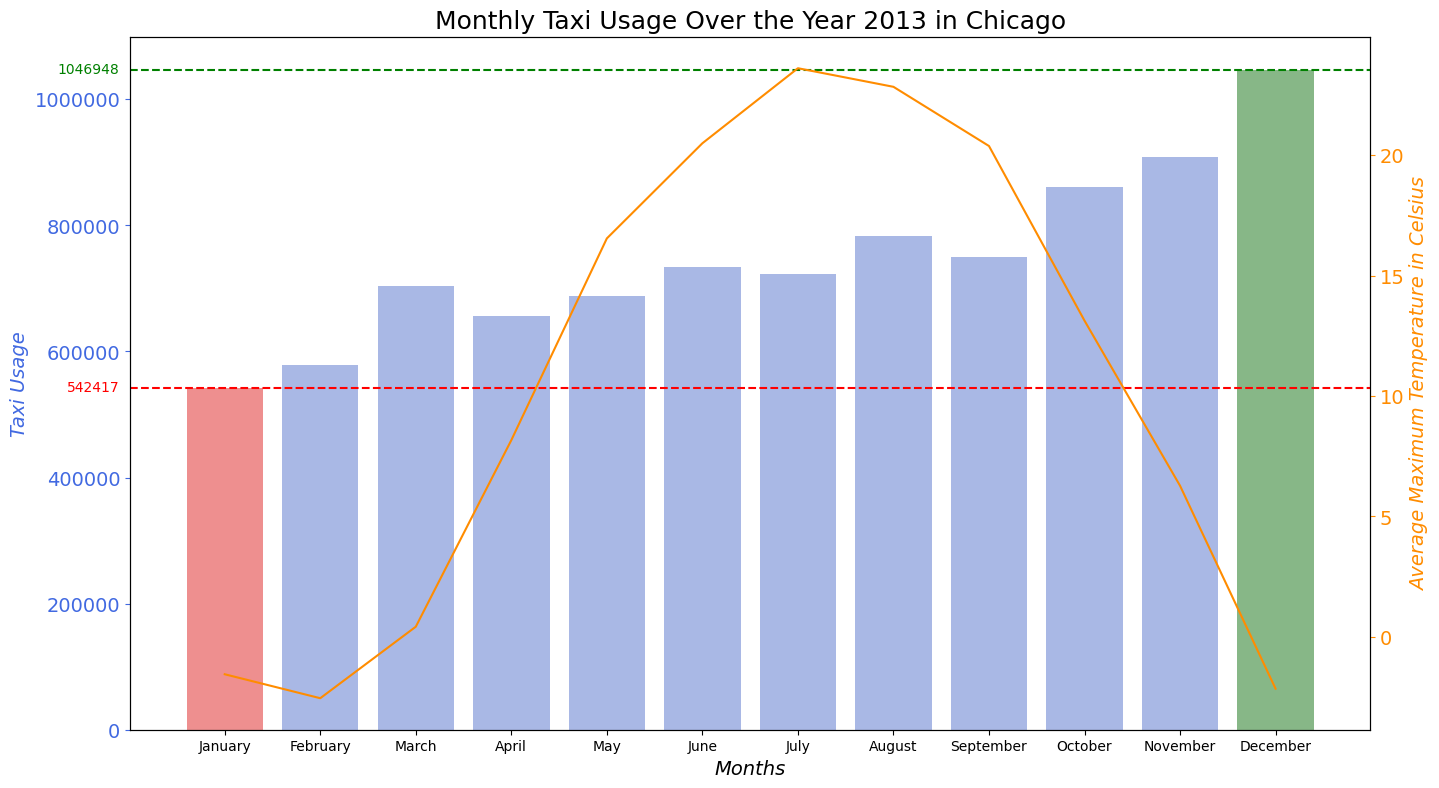

In [8]:
#barplot with monthly taxi usage with temperature curve
create_plot_for_visualization("barplot", dfFleet_usage_over_2013.groupby(['start_time_month'])['Trip_ID'].count().reset_index(), 
                              'start_time_month', 'Trip_ID', True, 
                             "Monthly Taxi Usage Over the Year 2013 in Chicago", "Months",
                             "Taxi Usage", "Average Maximum Temperature in Celsius", -1.1)

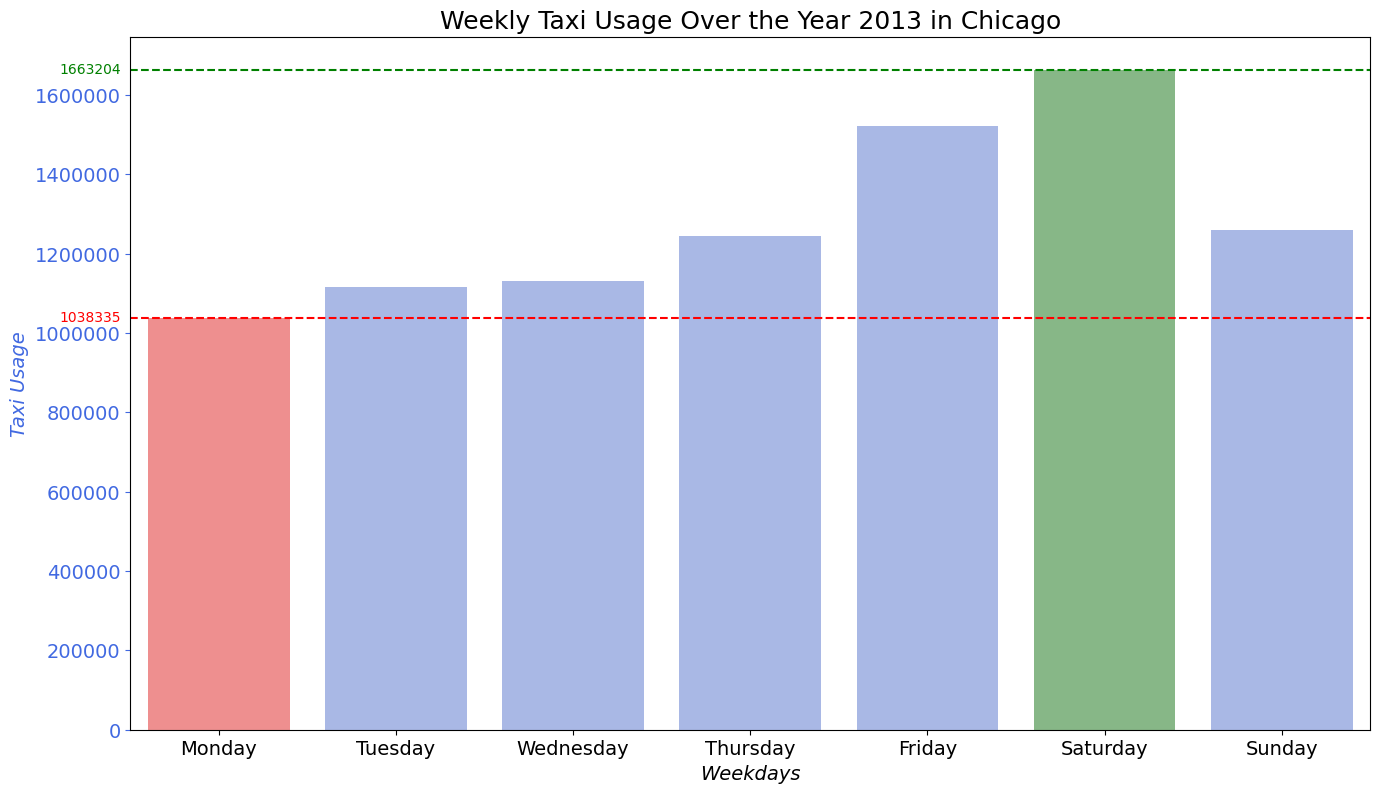

In [9]:
#barplot with taxi usage grouped by days
dfFleet_usage_over_2013_dayOfWeek = dfFleet_usage_over_2013

# Make dayOfWeek column categorial and define custom ordering
dfFleet_usage_over_2013_dayOfWeek['dayOfWeek'] = pd.Categorical(dfFleet_usage_over_2013_dayOfWeek['dayOfWeek'], ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Sort column 'dayOfWeek' based on the custom order
dfFleet_usage_over_2013_dayOfWeek = dfFleet_usage_over_2013_dayOfWeek.sort_values("dayOfWeek")


create_plot_for_visualization("barplot", dfFleet_usage_over_2013.groupby(['dayOfWeek'])['Trip_ID'].count().reset_index(), 
                                'dayOfWeek', 'Trip_ID', False, 
                                "Weekly Taxi Usage Over the Year 2013 in Chicago", "Weekdays",
                                "Taxi Usage", "Average maximum temperature in celsius", -0.55)

Patterns to observe:
- Almost every weekday (friday excluded) has a lower usage of taxis compared to the weekend days from friday to sunday
- This may be caused by trips to the city/clubs/bars/shopping areas aggregated on the weekend

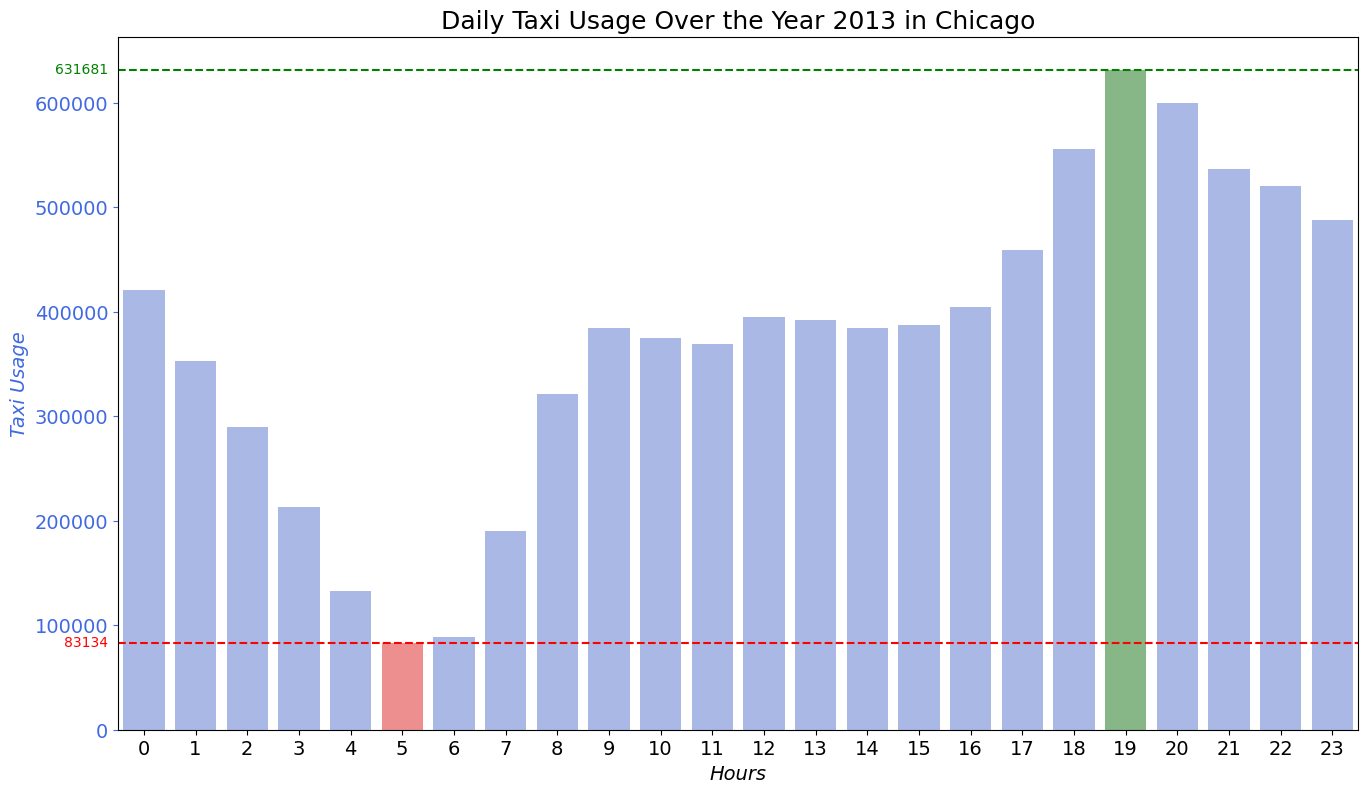

In [10]:
#barplot with taxi usage grouped by hours with temperature curve
create_plot_for_visualization("barplot", dfFleet_usage_over_2013.groupby(['start_time_hourly'])['Trip_ID'].count().reset_index(), 
                                'start_time_hourly', 'Trip_ID', False, 
                                "Daily Taxi Usage Over the Year 2013 in Chicago", "Hours",
                                "Taxi Usage", "Average maximum temperature in celsius", -0.7)

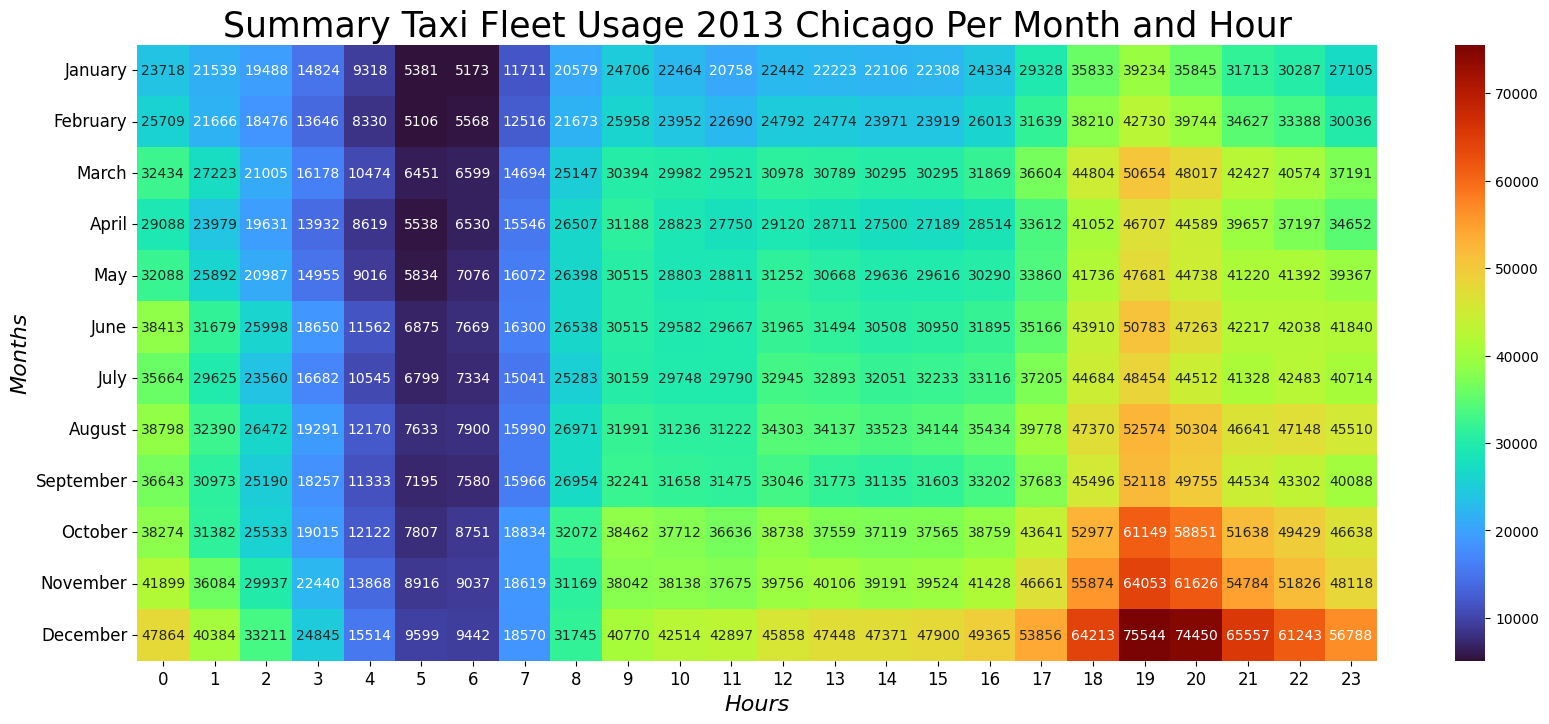

In [11]:
# calculation pivot table for correct layout in heatmap
pivot = dfFleet_usage_over_2013.groupby(['start_time_month', 'start_time_hourly'])['Trip_ID'].count().reset_index().pivot(index='start_time_month', columns='start_time_hourly', values='Trip_ID')

# adjusting figure size
plt.figure(figsize = (20,8))

# plotting seaborn heatmap
hmap= sns.heatmap(pivot, cmap="turbo", annot=True, fmt="d", yticklabels=months)

# styling the output heatmap plot
plt.yticks(rotation=0, fontsize=12)
plt.xticks(rotation=0, fontsize=12)
hmap.set_xlabel('Hours', fontsize=16, style='oblique')
hmap.set_ylabel('Months', fontsize=16, style='oblique')
hmap.axes.set_title("Summary Taxi Fleet Usage 2013 Chicago Per Month and Hour", fontsize=25)

plt.show()